## 1. Biblioteki

In [3]:

import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):# Позволяет пройти по файлам 
    for i, filename in enumerate(filenames):
        if i<5:
            print(os.path.join(dirname,filename)) # Метод join позволяет вам совместить несколько путей при помощи присвоенного разделителя


/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ufi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/vfl.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/sohu.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/rdcm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/virt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/djci.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/sqqq.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/ipac.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/vb.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/cper.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/ufi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/vfl.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/sohu.us.txt
/kaggle/input/price-volume-data-for-all

In [4]:
# symbols = ['aapl','goog','ibm']

## 2. Smotrim danye

              goog     ibm    aapl
2015-01-02  524.81  145.54  103.50
2015-01-05  513.87  143.24  100.58
2015-01-06  501.96  140.14  100.59
2015-01-07  501.10  139.23  102.01
2015-01-08  502.68  142.26  105.93
...            ...     ...     ...
2016-12-26     NaN     NaN     NaN
2016-12-27  791.55  160.90  115.41
2016-12-28  785.05  159.98  114.92
2016-12-29  782.79  160.38  114.89
2016-12-30  771.82  159.79  113.99

[521 rows x 3 columns]


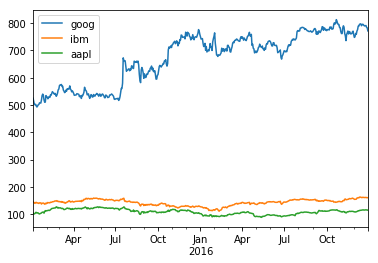

In [5]:
# функция которая делает дату данных по акциям
def stocks_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/{}.us.txt".format(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)# С помощью  join можно делать рабочий путь до файла
    return df

dates = pd.date_range('2015-01-02','2016-12-31',freq='B')
symbols = ['goog','ibm','aapl']
df = stocks_data(symbols, dates)
df.fillna(method='pad')
print(df)
# стороим гистограмму
df.interpolate().plot()
plt.show()

In [6]:
df.head()

,goog,ibm,aapl
2015-01-02,524.81,145.54,103.50
2015-01-05,513.87,143.24,100.58
2015-01-06,501.96,140.14,100.59
2015-01-07,501.10,139.23,102.01
2015-01-08,502.68,142.26,105.93


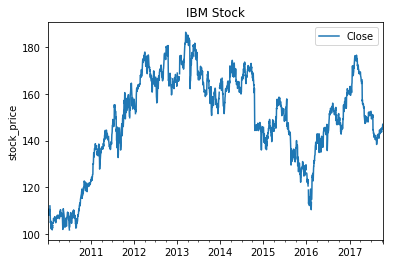

In [7]:
# строим и делаем красоту
dates = pd.date_range('2010-01-02','2017-10-11',freq='B')
df1=pd.DataFrame(index=dates)
df_ibm=pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/ibm.us.txt", parse_dates=True, index_col=0)
df_ibm=df1.join(df_ibm)
df_ibm[['Close']].plot()
plt.ylabel("stock_price")
plt.title("IBM Stock")
plt.show()

In [8]:
df_ibm=df_ibm[['Close']]
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2028 entries, 2010-01-04 to 2017-10-11
Freq: B
Data columns (total 1 columns):
Close    1958 non-null float64
dtypes: float64(1)
memory usage: 111.7 KB


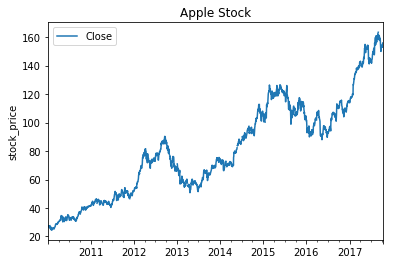

In [9]:
dates = pd.date_range('2010-01-02','2017-10-11',freq='B')
df1=pd.DataFrame(index=dates)
df_aapl=pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/aapl.us.txt", parse_dates=True, index_col=0)
df_aapl=df1.join(df_aapl)
df_aapl[['Close']].plot()
plt.ylabel("stock_price")
plt.title("Apple Stock")
plt.show()

In [10]:
df_aapl=df_aapl[['Close']]
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2028 entries, 2010-01-04 to 2017-10-11
Freq: B
Data columns (total 1 columns):
Close    1958 non-null float64
dtypes: float64(1)
memory usage: 111.7 KB


In [11]:
df_ibm = df_ibm.fillna(method = 'ffill')
df_aapl = df_aapl.fillna(method = 'ffill')

# перобразует в значения от -1 до 1 (типо уменьшает по размеру)
scaler_1 = MinMaxScaler(feature_range=(-1, 1))
df_ibm['Close'] = scaler_1.fit_transform(df_ibm['Close'].values.reshape(-1,1))

scaler_2 = MinMaxScaler(feature_range=(-1, 1))
df_aapl['Close'] = scaler_2.fit_transform(df_aapl['Close'].values.reshape(-1,1))

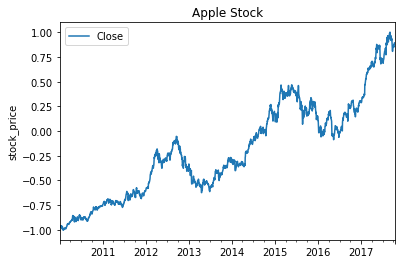

In [12]:
df_aapl=df1.join(df_aapl)
df_aapl[['Close']].plot()
plt.ylabel("stock_price")
plt.title("Apple Stock")
plt.show()

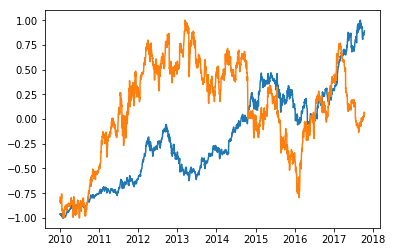

In [13]:
plt.plot(df_aapl['Close'])
plt.plot(df_ibm['Close'])
plt.show()

In [14]:
def load_data_2(stock_1 , stock_2, look_back):
    data_raw_1= stock_1.as_matrix()
    data_raw_2 = stock_2.as_matrix()
    data_useful = []
    
    # забиваем дату значениями икс-ов
    for index in range(len(data_raw_1) - look_back - 21): 
        # цикл идет до числа равного длинне data_raw минус look_back
        # look_back это на какой день мы предсказываем назад
        data_1 = []
        data_1.append(data_raw_1[index])
        data_1.append(data_raw_1[index + 7])
        data_1.append(data_raw_1[index + 14])
        data_1.extend(data_raw_1[index+20: index+21+look_back])
                
        data_2 = []  
        # добавляем сначала в новый список нужные значения
        # эти значения типо от предыдущих предсказаний
        data_2.append(data_raw_2[index])
        data_2.append(data_raw_2[index + 7])
        data_2.append(data_raw_2[index + 14])
        data_2.extend(data_raw_2[index+20: index+21+look_back])
        # делаем из списка  массив numpy
        data_2 = np.array(data_2)
        # делаем его на всякий случай -1 на 1
        data_2.reshape(-1,1)
        data_1 = np.array(data_1)
        data_1.reshape(-1,1)
        data_3 = np.hstack((data_1 , data_2))
        # "приклеиваем" дата 2 к основной дате
        data_useful.append(data_3)
        if index == -1:
            print(type(data_raw_1[index:index + look_back]))
            print(data_raw_1[index:index + look_back].shape)
    # делаем из списка  массив numpy
    data_useful = np.array(data_useful);

    test_set_size = int(np.round(0.3 * data_useful.shape[0]));
    train_set_size = data_useful.shape[0] - (test_set_size);
    
    x_train_useful = data_useful[:train_set_size,:-1,:]
    y_train_useful = data_useful[:train_set_size,-1,:]
    
    x_test_useful  = data_useful [train_set_size:,:-1]
    y_test_useful  = data_useful [train_set_size:,-1,:]
    
    return [x_train_useful , y_train_useful , x_test_useful , y_test_useful]

In [15]:
look_back = 10
x_train_useful, y_train_useful, x_test_useful, y_test_useful = load_data_2(df_aapl, df_ibm, look_back)
print('x_train_useful.shape = ',x_train_useful.shape)
print('y_train_useful.shape = ',y_train_useful.shape)
print('x_test_useful.shape = ',x_test_useful.shape)
print('y_test_useful.shape = ',y_test_useful.shape)


x_train_useful.shape =  (1398, 13, 2)
y_train_useful.shape =  (1398, 2)
x_test_useful.shape =  (599, 13, 2)
y_test_useful.shape =  (599, 2)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Делаем тензоры 
x_train_useful = torch.from_numpy(x_train_useful).type(torch.Tensor)
x_test_useful = torch.from_numpy(x_test_useful).type(torch.Tensor)
y_train_useful = torch.from_numpy(y_train_useful).type(torch.Tensor)
y_test_useful = torch.from_numpy(y_test_useful).type(torch.Tensor)

print(x_train_useful.size(), y_train_useful.size())

n_steps = look_back-1
batch_size = 1606
num_epochs = 350
#n_iters = 3000
#n_iters / (len(train_X) / batch_size)
#num_epochs = int(num_epochs)

# train_useful = torch.utils.data.TensorDataset(x_train_useful,y_train_useful)
# test_useful = torch.utils.data.TensorDataset(x_test_useful,y_test_useful)

# train_loader_useful = torch.utils.data.DataLoader(dataset=train_useful, 
#                                            batch_size=batch_size, 
#                                            shuffle=False)

# test_loader_useful = torch.utils.data.DataLoader(dataset=test_useful, 
#                                           batch_size=batch_size, 
#                                           shuffle=False)

torch.Size([1398, 13, 2]) torch.Size([1398, 2])


## 3. Sozdayem model

In [25]:
#####################
input_dim = 2
hidden_dim = 32
num_layers = 2 
output_dim = 2

# создаем слои самой нейронной сети
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # магия
        self.hidden_dim = hidden_dim

        # Количество скрытых слоев
        self.num_layers = num_layers

        # Создаем нашу нейросеть тип LSTM
        # batch_first=True так надо
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # рандомно отключаем нейроны для лучшей обучаемости
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # функция для отеключения нейроноа
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.dropout(out)
        out = self.fc(out[:, -1, :]) 
        
        return out
    
model = LSTM(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, num_layers = num_layers)

loss_fn = torch.nn.MSELoss(size_average=True)

optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(2, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3)
  (fc): Linear(in_features=32, out_features=2, bias=True)
)
10
torch.Size([128, 2])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([2, 32])
torch.Size([2])


In [26]:
# optimiser = torch.optim.Adam(model.parameters(), lr=0.00001)

In [27]:
# Train model
#####################
# Build model
#####################
input_dim = 2
hidden_dim = 32
num_layers = 2 
output_dim = 2
num_epochs = 1000
hist = np.zeros(num_epochs)

# главная функция и обучения(цикл) 
seq_dim =look_back-1  
model.train()
for t in range(num_epochs):
    # model.hidden = model.init_hidden()
    
    # print(type(x_train_aapl))
    y_train_pred = model(x_train_useful)

    loss = loss_fn(y_train_pred, y_train_useful)
    
    print(loss)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # функция для обнуление градиента(сложно объяснить, но мы градиентом уменьшаем ошибку) 
    optimiser.zero_grad()
    loss.backward()

    # тоже сложная функция оптимизации
    optimiser.step()

tensor(0.3309, grad_fn=<MseLossBackward>)
tensor(0.3217, grad_fn=<MseLossBackward>)
tensor(0.3123, grad_fn=<MseLossBackward>)
tensor(0.3039, grad_fn=<MseLossBackward>)
tensor(0.2972, grad_fn=<MseLossBackward>)
tensor(0.2890, grad_fn=<MseLossBackward>)
tensor(0.2813, grad_fn=<MseLossBackward>)
tensor(0.2737, grad_fn=<MseLossBackward>)
tensor(0.2668, grad_fn=<MseLossBackward>)
tensor(0.2606, grad_fn=<MseLossBackward>)
tensor(0.2545, grad_fn=<MseLossBackward>)
Epoch  10 MSE:  0.2545499801635742
tensor(0.2481, grad_fn=<MseLossBackward>)
tensor(0.2407, grad_fn=<MseLossBackward>)
tensor(0.2350, grad_fn=<MseLossBackward>)
tensor(0.2280, grad_fn=<MseLossBackward>)
tensor(0.2224, grad_fn=<MseLossBackward>)
tensor(0.2166, grad_fn=<MseLossBackward>)
tensor(0.2109, grad_fn=<MseLossBackward>)
tensor(0.2052, grad_fn=<MseLossBackward>)
tensor(0.2006, grad_fn=<MseLossBackward>)
tensor(0.1947, grad_fn=<MseLossBackward>)
Epoch  20 MSE:  0.19473321735858917
tensor(0.1895, grad_fn=<MseLossBackward>)
tenso

tensor(0.0127, grad_fn=<MseLossBackward>)
tensor(0.0131, grad_fn=<MseLossBackward>)
tensor(0.0126, grad_fn=<MseLossBackward>)
tensor(0.0120, grad_fn=<MseLossBackward>)
tensor(0.0127, grad_fn=<MseLossBackward>)
tensor(0.0130, grad_fn=<MseLossBackward>)
tensor(0.0125, grad_fn=<MseLossBackward>)
tensor(0.0115, grad_fn=<MseLossBackward>)
tensor(0.0124, grad_fn=<MseLossBackward>)
tensor(0.0124, grad_fn=<MseLossBackward>)
Epoch  190 MSE:  0.012371833436191082
tensor(0.0116, grad_fn=<MseLossBackward>)
tensor(0.0120, grad_fn=<MseLossBackward>)
tensor(0.0120, grad_fn=<MseLossBackward>)
tensor(0.0131, grad_fn=<MseLossBackward>)
tensor(0.0118, grad_fn=<MseLossBackward>)
tensor(0.0121, grad_fn=<MseLossBackward>)
tensor(0.0120, grad_fn=<MseLossBackward>)
tensor(0.0128, grad_fn=<MseLossBackward>)
tensor(0.0121, grad_fn=<MseLossBackward>)
tensor(0.0118, grad_fn=<MseLossBackward>)
Epoch  200 MSE:  0.011760887689888477
tensor(0.0119, grad_fn=<MseLossBackward>)
tensor(0.0122, grad_fn=<MseLossBackward>)


tensor(0.0101, grad_fn=<MseLossBackward>)
tensor(0.0104, grad_fn=<MseLossBackward>)
tensor(0.0100, grad_fn=<MseLossBackward>)
tensor(0.0106, grad_fn=<MseLossBackward>)
tensor(0.0110, grad_fn=<MseLossBackward>)
tensor(0.0107, grad_fn=<MseLossBackward>)
tensor(0.0098, grad_fn=<MseLossBackward>)
tensor(0.0103, grad_fn=<MseLossBackward>)
Epoch  370 MSE:  0.010349837131798267
tensor(0.0103, grad_fn=<MseLossBackward>)
tensor(0.0104, grad_fn=<MseLossBackward>)
tensor(0.0106, grad_fn=<MseLossBackward>)
tensor(0.0107, grad_fn=<MseLossBackward>)
tensor(0.0102, grad_fn=<MseLossBackward>)
tensor(0.0104, grad_fn=<MseLossBackward>)
tensor(0.0103, grad_fn=<MseLossBackward>)
tensor(0.0097, grad_fn=<MseLossBackward>)
tensor(0.0106, grad_fn=<MseLossBackward>)
tensor(0.0103, grad_fn=<MseLossBackward>)
Epoch  380 MSE:  0.010304132476449013
tensor(0.0105, grad_fn=<MseLossBackward>)
tensor(0.0101, grad_fn=<MseLossBackward>)
tensor(0.0100, grad_fn=<MseLossBackward>)
tensor(0.0103, grad_fn=<MseLossBackward>)


tensor(0.0095, grad_fn=<MseLossBackward>)
tensor(0.0095, grad_fn=<MseLossBackward>)
tensor(0.0093, grad_fn=<MseLossBackward>)
tensor(0.0093, grad_fn=<MseLossBackward>)
tensor(0.0095, grad_fn=<MseLossBackward>)
tensor(0.0094, grad_fn=<MseLossBackward>)
tensor(0.0098, grad_fn=<MseLossBackward>)
tensor(0.0097, grad_fn=<MseLossBackward>)
Epoch  550 MSE:  0.009685381315648556
tensor(0.0089, grad_fn=<MseLossBackward>)
tensor(0.0094, grad_fn=<MseLossBackward>)
tensor(0.0100, grad_fn=<MseLossBackward>)
tensor(0.0089, grad_fn=<MseLossBackward>)
tensor(0.0094, grad_fn=<MseLossBackward>)
tensor(0.0101, grad_fn=<MseLossBackward>)
tensor(0.0093, grad_fn=<MseLossBackward>)
tensor(0.0093, grad_fn=<MseLossBackward>)
tensor(0.0090, grad_fn=<MseLossBackward>)
tensor(0.0093, grad_fn=<MseLossBackward>)
Epoch  560 MSE:  0.009273284114897251
tensor(0.0095, grad_fn=<MseLossBackward>)
tensor(0.0093, grad_fn=<MseLossBackward>)
tensor(0.0094, grad_fn=<MseLossBackward>)
tensor(0.0089, grad_fn=<MseLossBackward>)


tensor(0.0086, grad_fn=<MseLossBackward>)
tensor(0.0081, grad_fn=<MseLossBackward>)
tensor(0.0086, grad_fn=<MseLossBackward>)
tensor(0.0090, grad_fn=<MseLossBackward>)
tensor(0.0088, grad_fn=<MseLossBackward>)
tensor(0.0083, grad_fn=<MseLossBackward>)
tensor(0.0084, grad_fn=<MseLossBackward>)
Epoch  730 MSE:  0.008399799466133118
tensor(0.0091, grad_fn=<MseLossBackward>)
tensor(0.0085, grad_fn=<MseLossBackward>)
tensor(0.0087, grad_fn=<MseLossBackward>)
tensor(0.0084, grad_fn=<MseLossBackward>)
tensor(0.0088, grad_fn=<MseLossBackward>)
tensor(0.0088, grad_fn=<MseLossBackward>)
tensor(0.0081, grad_fn=<MseLossBackward>)
tensor(0.0087, grad_fn=<MseLossBackward>)
tensor(0.0084, grad_fn=<MseLossBackward>)
tensor(0.0084, grad_fn=<MseLossBackward>)
Epoch  740 MSE:  0.008355307392776012
tensor(0.0081, grad_fn=<MseLossBackward>)
tensor(0.0086, grad_fn=<MseLossBackward>)
tensor(0.0083, grad_fn=<MseLossBackward>)
tensor(0.0089, grad_fn=<MseLossBackward>)
tensor(0.0082, grad_fn=<MseLossBackward>)


tensor(0.0086, grad_fn=<MseLossBackward>)
tensor(0.0080, grad_fn=<MseLossBackward>)
tensor(0.0082, grad_fn=<MseLossBackward>)
tensor(0.0075, grad_fn=<MseLossBackward>)
tensor(0.0079, grad_fn=<MseLossBackward>)
tensor(0.0081, grad_fn=<MseLossBackward>)
Epoch  910 MSE:  0.00807210523635149
tensor(0.0083, grad_fn=<MseLossBackward>)
tensor(0.0076, grad_fn=<MseLossBackward>)
tensor(0.0079, grad_fn=<MseLossBackward>)
tensor(0.0076, grad_fn=<MseLossBackward>)
tensor(0.0075, grad_fn=<MseLossBackward>)
tensor(0.0075, grad_fn=<MseLossBackward>)
tensor(0.0078, grad_fn=<MseLossBackward>)
tensor(0.0077, grad_fn=<MseLossBackward>)
tensor(0.0076, grad_fn=<MseLossBackward>)
tensor(0.0079, grad_fn=<MseLossBackward>)
Epoch  920 MSE:  0.007908523082733154
tensor(0.0081, grad_fn=<MseLossBackward>)
tensor(0.0086, grad_fn=<MseLossBackward>)
tensor(0.0076, grad_fn=<MseLossBackward>)
tensor(0.0079, grad_fn=<MseLossBackward>)
tensor(0.0081, grad_fn=<MseLossBackward>)
tensor(0.0075, grad_fn=<MseLossBackward>)
t

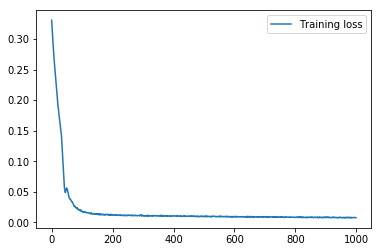

In [28]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [29]:
# model.train(False)

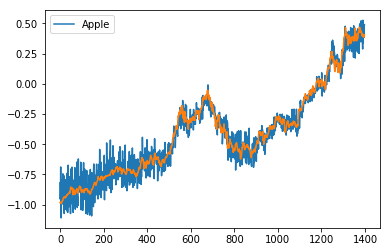

In [30]:

# Cтроим для apple train
plt.plot(y_train_pred.detach().numpy()[:,0], label="Apple")
plt.plot(y_train_useful.detach().numpy()[:,0])
plt.legend()
plt.show()

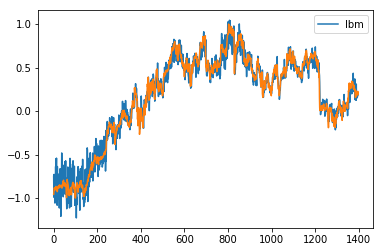

In [31]:
plt.plot(y_train_pred.detach().numpy()[:,1], label="Ibm")
plt.plot(y_train_useful.detach().numpy()[:,1])
plt.legend()
plt.show()

In [32]:
np.shape(y_train_pred)

torch.Size([1398, 2])

In [33]:
y_train_useful.detach().numpy().shape

(1398, 2)

In [34]:
y_train_pred = model(x_train_useful)
y_test_pred = model(x_test_useful)

In [35]:
print(y_train_pred.shape)
print(y_test_pred.shape)

torch.Size([1398, 2])
torch.Size([599, 2])


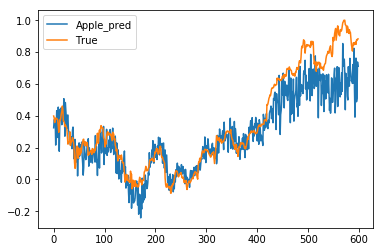

In [36]:
# Строим для apple test
plt.plot(y_test_pred.detach().numpy()[:,0], label="Apple_pred")
plt.plot(y_test_useful.detach().numpy()[:,0] , label="True")
plt.legend()
plt.show()

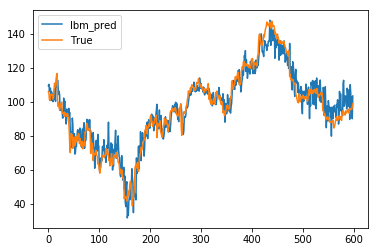

In [37]:
# Строим для IBM test
plt.plot(scaler_2.inverse_transform(y_test_pred.detach().numpy()[:,1].reshape(-1, 1)), label="Ibm_pred")
plt.plot(scaler_2.inverse_transform(y_test_useful.detach().numpy()[:,1].reshape(-1, 1)), label="True")
plt.legend()
plt.show()

In [38]:
# разделяем на aapl и ibm
y_train_pred_aapl = y_train_pred[:,1]
y_train_pred_ibm = y_train_pred[:,0]
y_test_pred_aapl = y_test_pred[:,1]
y_test_pred_ibm = y_test_pred[:,0]

# делаем reshape
y_train_useful[:,1].detach().numpy().reshape(-1, 1).shape
y_train_pred_aapl.reshape(-1, 1).shape

torch.Size([1398, 1])

In [39]:
y_test_pred_aapl.size()

torch.Size([599])

In [40]:
y_train_pred_aapl.shape

torch.Size([1398])

In [41]:
y_test_pred_aapl.shape

torch.Size([599])

In [42]:
y_train_pred[:2]

tensor([[-0.7548, -0.7958],
        [-0.8792, -0.9699]], grad_fn=<SliceBackward>)

In [43]:
y_train_useful[:2]

tensor([[-0.9846, -0.9575],
        [-0.9791, -0.9336]])

In [44]:
y_train_pred_aapl[:2]

tensor([-0.7958, -0.9699], grad_fn=<SliceBackward>)

In [45]:
########################### apple
y_train_pred_aapl = scaler_2.inverse_transform(y_train_pred_aapl.detach().numpy().reshape(-1, 1))
y_test_pred_aapl = scaler_2.inverse_transform(y_test_pred_aapl.detach().numpy().reshape(-1, 1))

# Считаем RMSE корень из средней квадратичной ошибки
trainScore_aapl = math.sqrt(mean_squared_error(scaler_2.inverse_transform(y_train_useful[:,1].detach().numpy().reshape(-1, 1)) , y_train_pred_aapl.reshape(-1, 1)))
print('Train Score Apple: %.2f RMSE' % (trainScore_aapl))
testScore_aapl = math.sqrt(mean_squared_error(scaler_2.inverse_transform(y_test_useful[:,1].detach().numpy().reshape(-1, 1)), y_test_pred_aapl.reshape(-1, 1) ))
print('Test Score Apple: %.2f RMSE' % (testScore_aapl))

########################### ibm
y_train_pred_ibm = scaler_1.inverse_transform(y_train_pred_ibm.detach().numpy().reshape(-1, 1))
y_test_pred_ibm = scaler_1.inverse_transform(y_test_pred_ibm.detach().numpy().reshape(-1, 1))

# Считаем RMSE корень из средней квадратичной ошибки
trainScore_ibm = math.sqrt(mean_squared_error(scaler_1.inverse_transform(y_train_useful[:,1].detach().numpy().reshape(-1, 1)), y_train_pred_ibm.reshape(-1, 1)))
print('Train Score Ibm: %.2f RMSE' % (trainScore_ibm))
testScore_ibm = math.sqrt(mean_squared_error(scaler_1.inverse_transform(y_test_useful[:,1].detach().numpy().reshape(-1, 1)) , y_test_pred_ibm.reshape(-1, 1) ))
print('Test Score Ibm: %.2f RMSE' % (testScore_ibm))

Train Score Apple: 6.42 RMSE
Test Score Apple: 6.59 RMSE
Train Score Ibm: 30.88 RMSE
Test Score Ibm: 16.06 RMSE


In [46]:
scaler_1.inverse_transform(y_test_useful[:,1].detach().numpy().reshape(-1, 1))[:5]

array([[151.33],
       [150.77],
       [148.5 ],
       [148.2 ],
       [149.88]], dtype=float32)

In [47]:
y_test_pred_ibm.reshape(-1, 1)[:5]

array([[157.7809 ],
       [159.94025],
       [159.83112],
       [159.95119],
       [153.1854 ]], dtype=float32)

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


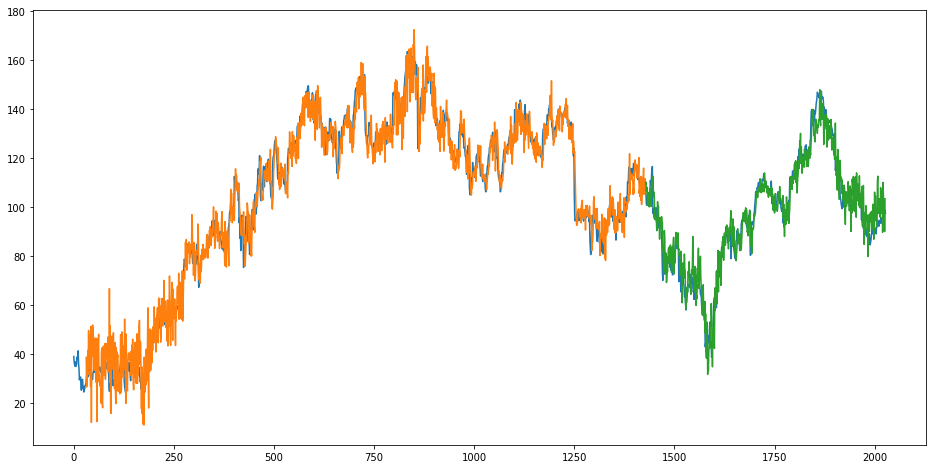

In [52]:
trainPredictPlot = np.empty_like(df_aapl)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back + 21:len(y_train_pred_aapl)  + 21 +look_back, :] = y_train_pred_aapl

print(trainPredictPlot)
testPredictPlot = np.empty_like(df_aapl)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred_aapl)+ 21 +look_back-1:len(df_aapl)-1, :] = y_test_pred_aapl

# делаем график(Большой)
plt.figure(figsize=(16,8))
plt.plot(scaler_2.inverse_transform(df_ibm))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


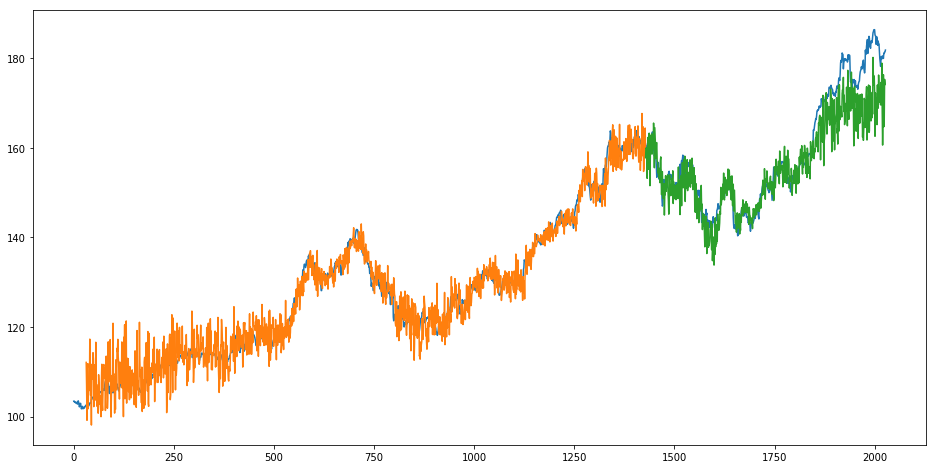

In [51]:
trainPredictPlot = np.empty_like(df_ibm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back + 21:len(y_train_pred_aapl)+look_back +21 , :] = y_train_pred_ibm

print(trainPredictPlot)
# готовим данные для графика
testPredictPlot = np.empty_like(df_ibm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred_ibm)+ 21 +look_back-1:len(df_ibm)-1, :] = y_test_pred_ibm

# опять делаем график
plt.figure(figsize=(16,8))
plt.plot(scaler_1.inverse_transform(df_aapl))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()